In [1]:
import os
os.chdir('..')

c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:468: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hinv @ G


Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  11
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  7
Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  11
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  7
Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  11
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  7
Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  11
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration

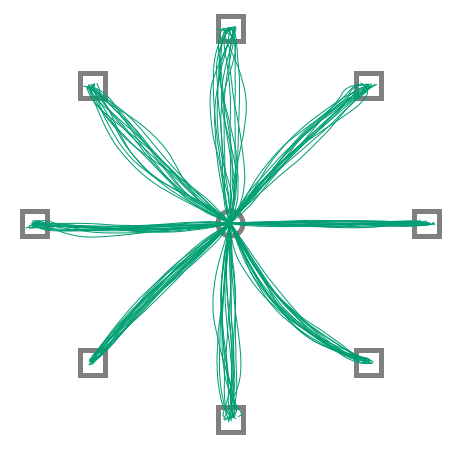

(np.float64(-16.5), np.float64(16.5), np.float64(28.5), np.float64(61.5))

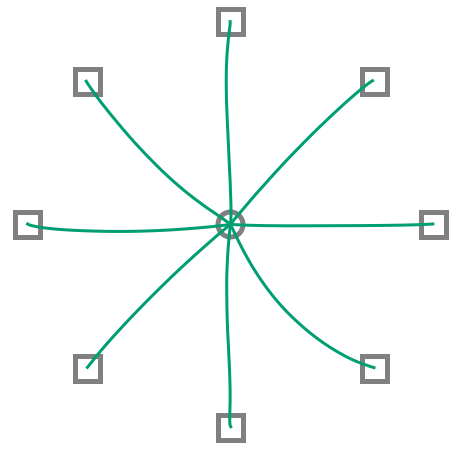

In [2]:


import sys
import os
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
XST = 0
YST = 45
st = [XST,YST]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 30
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [XST+cos(angles)*15,YST+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
        trajectories[num_sim,iter] = np.array([xILQG,yILQG]).T

        if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("img/Paper_plots/ILQG_Centerout.png",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [XST+cos(angles)*15,YST+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")


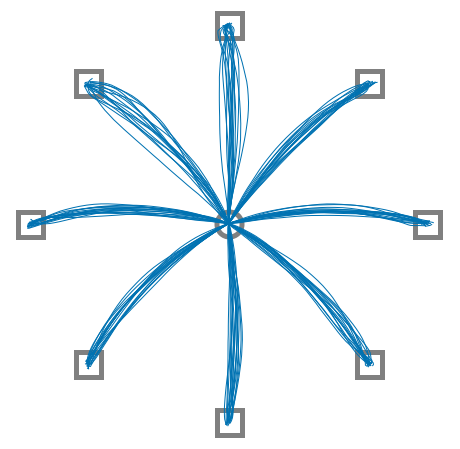

(np.float64(-16.500326486637913),
 np.float64(16.506856219396155),
 np.float64(13.5),
 np.float64(46.5))

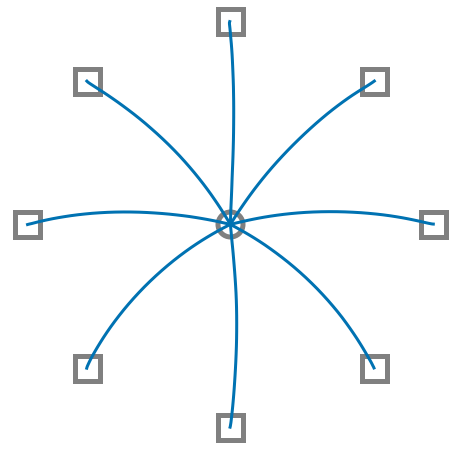

In [ ]:


import sys
import os
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
YST = 45
XST = 0
st = [XST,YST]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 50
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [XST+cos(angles)*15,YST+sin(angles)*15]
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        
        trajectories[num_sim,iter] = np.array([xFL,yFL]).T

        if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("img/Paper_plots/FL_Centerout.png",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [XST+cos(angles)*15,YST+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

In [4]:
print(ToCartesian(np.array([pi/4,pi/2])))

(np.float64(-2.1213203435596384), np.float64(44.5477272147525))


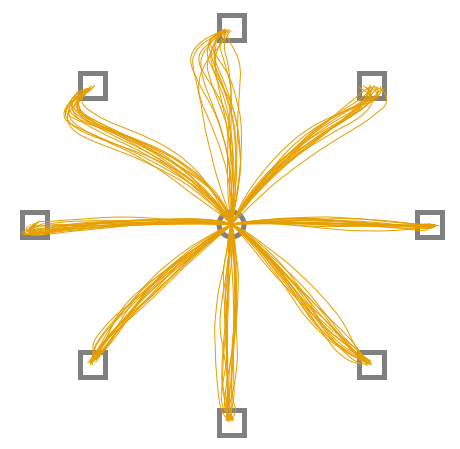

(np.float64(-16.73614803135894),
 np.float64(16.668382996031735),
 np.float64(28.5),
 np.float64(61.5))

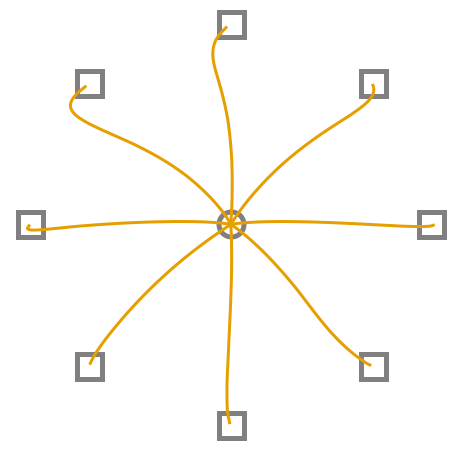

In [5]:


import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
YST= 45
XST = 0
st = [XST,YST]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 30
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [XST+cos(angles)*15,YST+sin(angles)*15]
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        
        trajectories[num_sim,iter] = np.array([xLQG,yLQG]).T

        if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("img/Paper_plots/DLQG_Centerout.png",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [XST+cos(angles)*15,YST+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

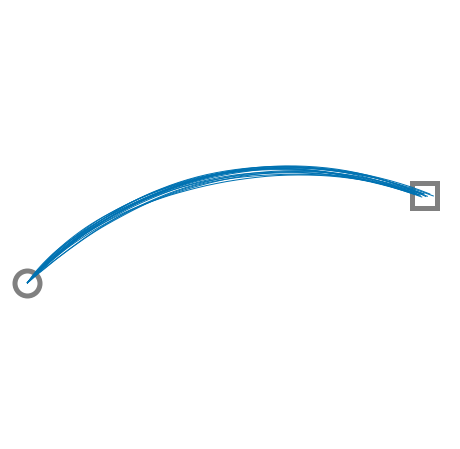

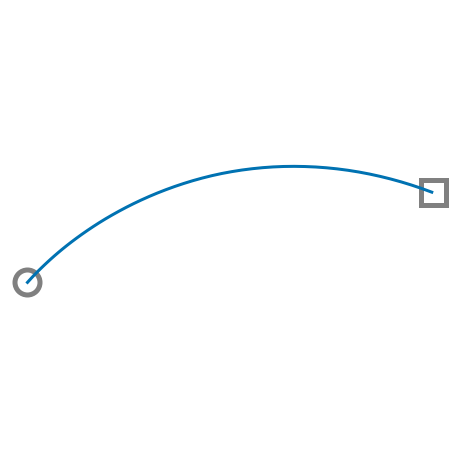

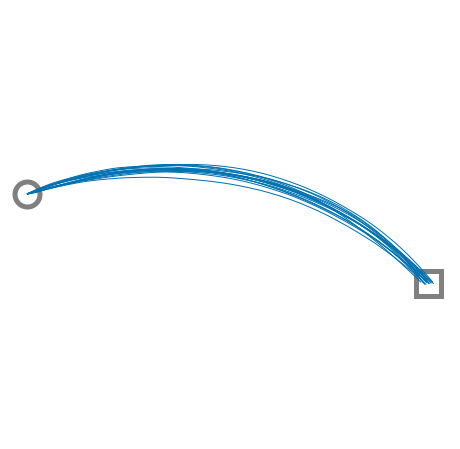

(np.float64(-22.25),
 np.float64(27.25),
 np.float64(29.359900429488615),
 np.float64(43.44209098073907))

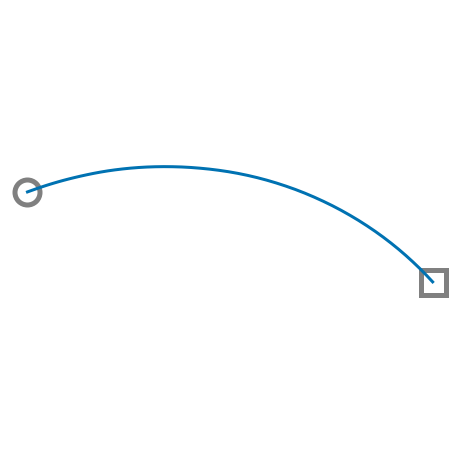

In [41]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e4,w2=1e4,w3=1,w4=1,r=1e-2,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xFL,yFL]).T
    if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e4,w2=1e4,w3=1,w4=1,r=1e-2,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xFL,yFL]).T
    if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

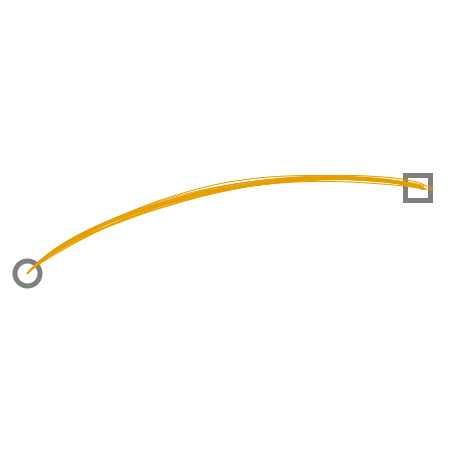

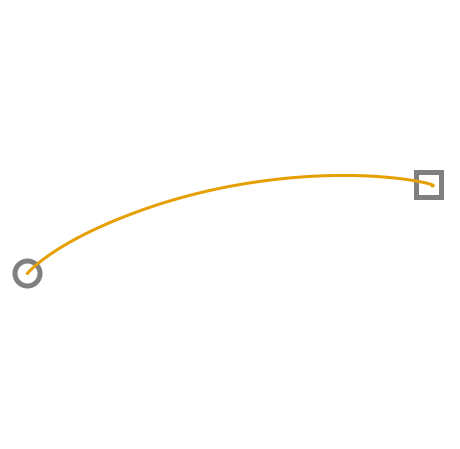

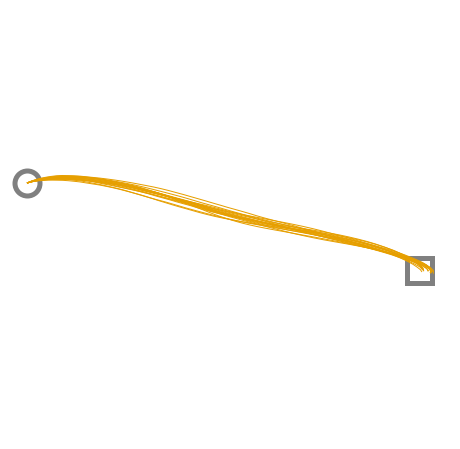

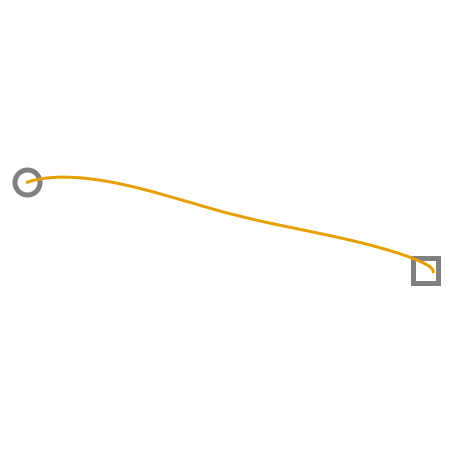

In [42]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xLQG,yLQG]).T
    if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))



plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xLQG,yLQG]).T
    if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))



plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:468: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8


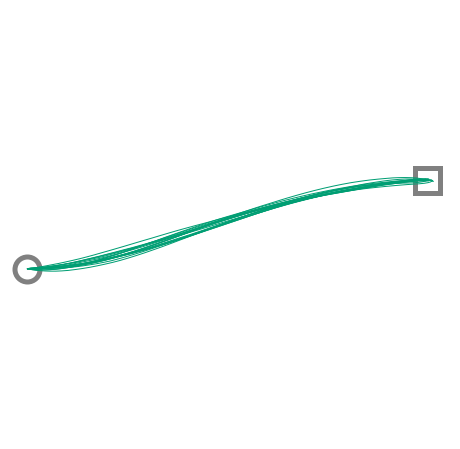

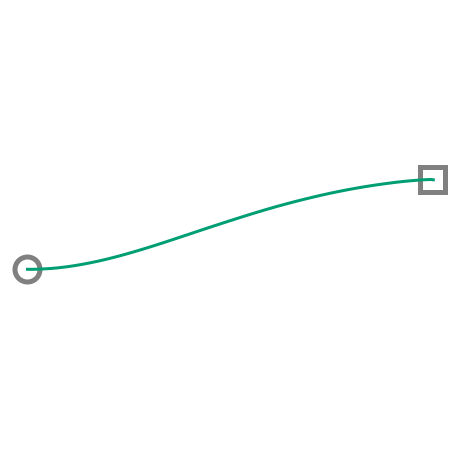

Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9


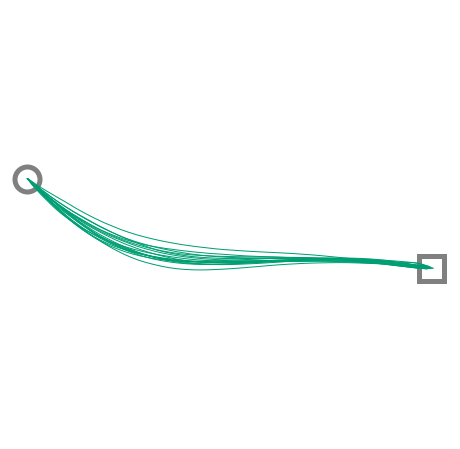

(np.float64(-22.25),
 np.float64(27.25),
 np.float64(29.5),
 np.float64(40.50000000000001))

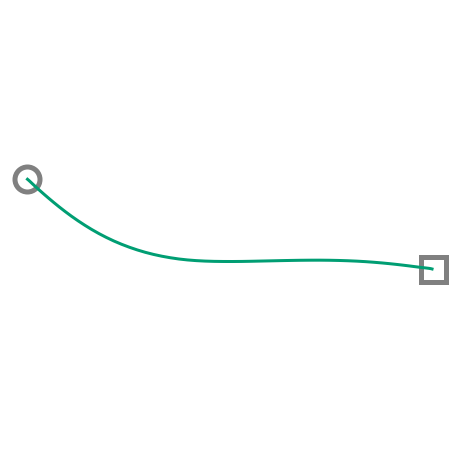

In [43]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):

    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
    trajectories[num_sim] = np.array([xILQG,yILQG]).T
    if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):

    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
    trajectories[num_sim] = np.array([xILQG,yILQG]).T
    if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

In [ ]:
print(ToCartesian(np.array([20,60])*pi/180))
print(ToCartesian(np.array([70,110])*pi/180))

print(compute_angles_from_cartesian(-20,30),compute_angles_from_cartesian(20,50))


(np.float64(33.921168486585955), np.float64(42.75926014917293))
(np.float64(-22.739395700229935), np.float64(28.190778623577252))
(np.float64(1.1273311120203477), np.float64(1.9262116888145653)) (np.float64(0.6149978935187046), np.float64(1.0926873644218285))


In [ ]:
def f(x, u):
    C = np.array(
        [-x[3] * (2 * x[2] + x[3]) * a2 * np.sin(x[1]), x[2] ** 2 * a2 * np.sin(x[1])]
    )

    Denominator = a3 * (a1 - a3) - a2**2 * np.cos(x[1]) ** 2
    Minv = np.array(
        [
            [a3 / Denominator, (-a2 * np.cos(x[1]) - a3) / Denominator],
            [
                (-a2 * np.cos(x[1]) - a3) / Denominator,
                (2 * a2 * np.cos(x[1]) + a1) / Denominator,
            ],
        ]
    )
    A = np.array([[2, -2, 0, 0, 1.5, -2], [0, 0, 2, -2, 2, -1.5]])

    l0 = np.array([7.32, 3.26, 6.4, 4.26, 5.95, 4.04])
    theta0 = np.array(
        [
            [
                2 * pi / 360 * 15,
                2 * pi / 360 * 4.88,
                0,
                0,
                2 * pi / 360 * 4.5,
                2 * pi / 360 * 2.12,
            ],
            [
                0,
                0,
                2 * pi / 360 * 80.86,
                2 * pi / 360 * 109.32,
                2 * pi / 360 * 92.96,
                2 * pi / 360 * 91.52,
            ],
        ]
    )
    l = 1 + A[0] * (theta0[0] - x[0]) / l0 + A[1] * (theta0[1] - x[1]) / l0
    v = A[0] * (-x[2]) / l0 + A[1] * (-x[3]) / l0

    fl = np.exp(np.abs((l**1.55 - 1) / 0.81))

    ff_v = np.where(
        v <= 0,
        (-7.39 - v) / (-7.39 + (-3.21 + 4.17) * v),
        (0.62 - (-3.12 + 4.21 * l - 2.67 * l**2) * v) / (0.62 + v),
    )
    theta = Minv @ (A @ (u * fl * ff_v) - Bdyn @ x[2:4] - C)

    return np.array([[x[2], x[3], theta[0], theta[1], 0, 0]])

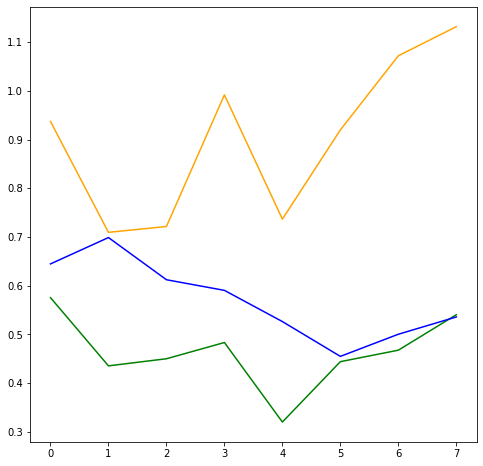

In [ ]:
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

st = [0,30]
MovementTime = .5
NumIteration = 50
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.subplots(figsize = (8,8))
NUM_SIM = 100
Cost_value = np.zeros((NUM_SIM,8,3))
Commands = np.zeros((NUM_SIM,8,3,NumIteration-1,6))
for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,30+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        Commands[num_sim,iter] = np.array([uILQG,uFL,uDLQG])
        Cost_value[num_sim,iter] = np.array([Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)])

Cost_value = np.mean(Cost_value,axis = 0)
Commands = np.mean(Commands,axis = 0)
colors = ["green","blue","orange"]

for i in range(3):
    plt.plot(np.arange(8),Cost_value[:,i],color = colors[i])
plt.show()

AttributeError: AxesHostAxes.set() got an unexpected keyword argument 'projection'

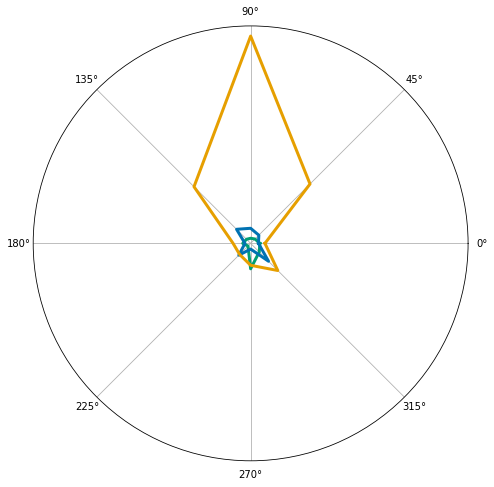

In [25]:
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,45]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax = plt.subplots(figsize = (8,8),subplot_kw={'projection': 'polar'})
NUM_SIM = 2
Cost_value = np.zeros((NUM_SIM,9,3))
Commands = np.zeros((NUM_SIM,8,3,NumIteration-1,6))
for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,45+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        Commands[num_sim,iter] = np.array([uILQG,uFL,uDLQG])
        Cost_value[num_sim,iter] = np.array([Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)])

Cost_value = np.mean(Cost_value,axis = 0)
Commands = np.mean(Commands,axis = 0)
colors = ["#009E73","#0072B2","#E69F00"]
Cost_value[8] = Cost_value[0]

angles = np.linspace(0, 2*np.pi, 9)
for i in range(3):
    ax.plot(angles, Cost_value[:,i], color=colors[i], linewidth=3)

ax.set_yticks([])

# Create inset axes for zoomed region (e.g. zoom on theta from 1.2 to 1.6 rad)
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper right',axes_kwargs={'projection': 'polar'})

zoom_region = (angles >= 1.2) & (angles <= 1.6)
for i in range(3):
    inset_ax.plot(angles[zoom_region], Cost_value[zoom_region,i], color=colors[i], linewidth=2)

inset_ax.set_yticklabels([])
inset_ax.set_xticklabels([])
inset_ax.set_title("Zoom", fontsize=10)

plt.show()